In [84]:
# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets


# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

# Part 1 Project Summary

#### The Target label, Type of Glass has 6 classes:

1: building_windows_float_processed

2: building_windows_non_float_processed

3: vehicle_windows_float_processed

5: containers

6: tableware

7: headlamps

In [85]:
glass_df = pd.read_csv("glass.data.csv")
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Part 2 Dataset Description

In [153]:
print(glass_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


# Part 3 Basic Descriptive Statistics

In [87]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Text(0.5, 1.0, 'Count of Glass Types')

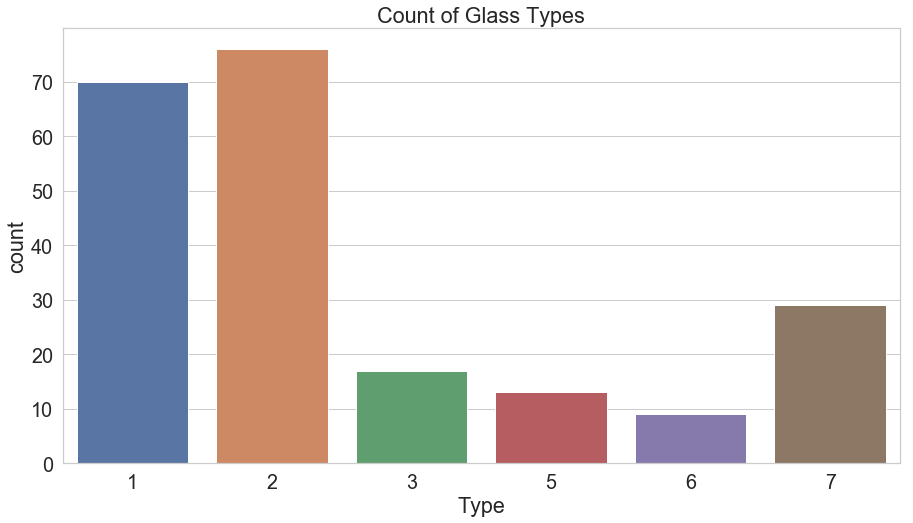

In [88]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=glass_df).set_title('Count of Glass Types')

# Part 4 Data Management Processes

In [23]:
# dataset should have no missing measurements
assert len(glass_df.loc[(glass_df['RI'].isnull()) |
                         (glass_df['Na'].isnull()) |
                         (glass_df['Mg'].isnull()) |
                         (glass_df['Al'].isnull()) |
                         (glass_df['Si'].isnull()) |
                         (glass_df['K'].isnull()) |
                         (glass_df['Ca'].isnull()) |
                         (glass_df['Ba'].isnull()) |
                         (glass_df['Fe'].isnull()) |
                         (glass_df['Type'].isnull())]) == 0

### Outliers deleted using z-score

In [24]:
from scipy import stats
glass_df = glass_df[(np.abs(stats.zscore(glass_df)) < 3).all(axis=1)]

# Part V Data Visualization

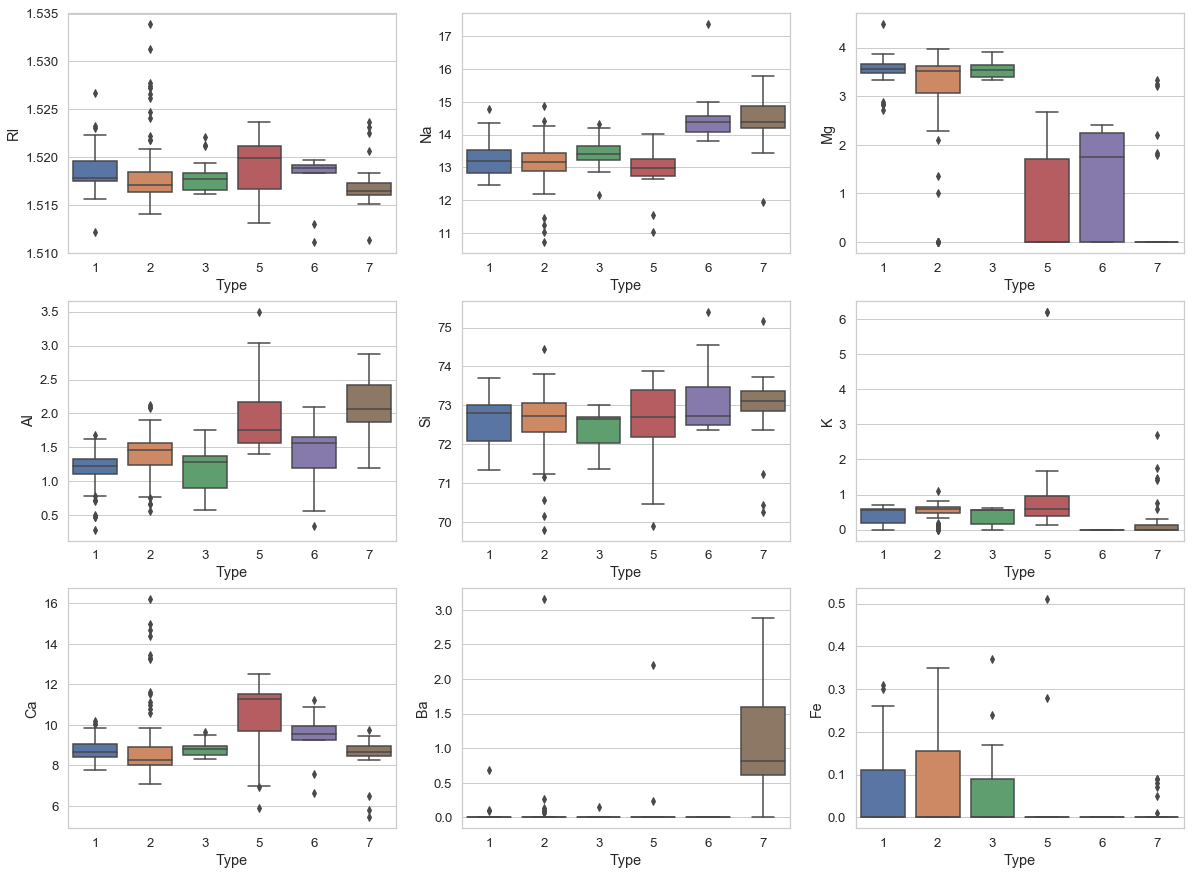

In [89]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

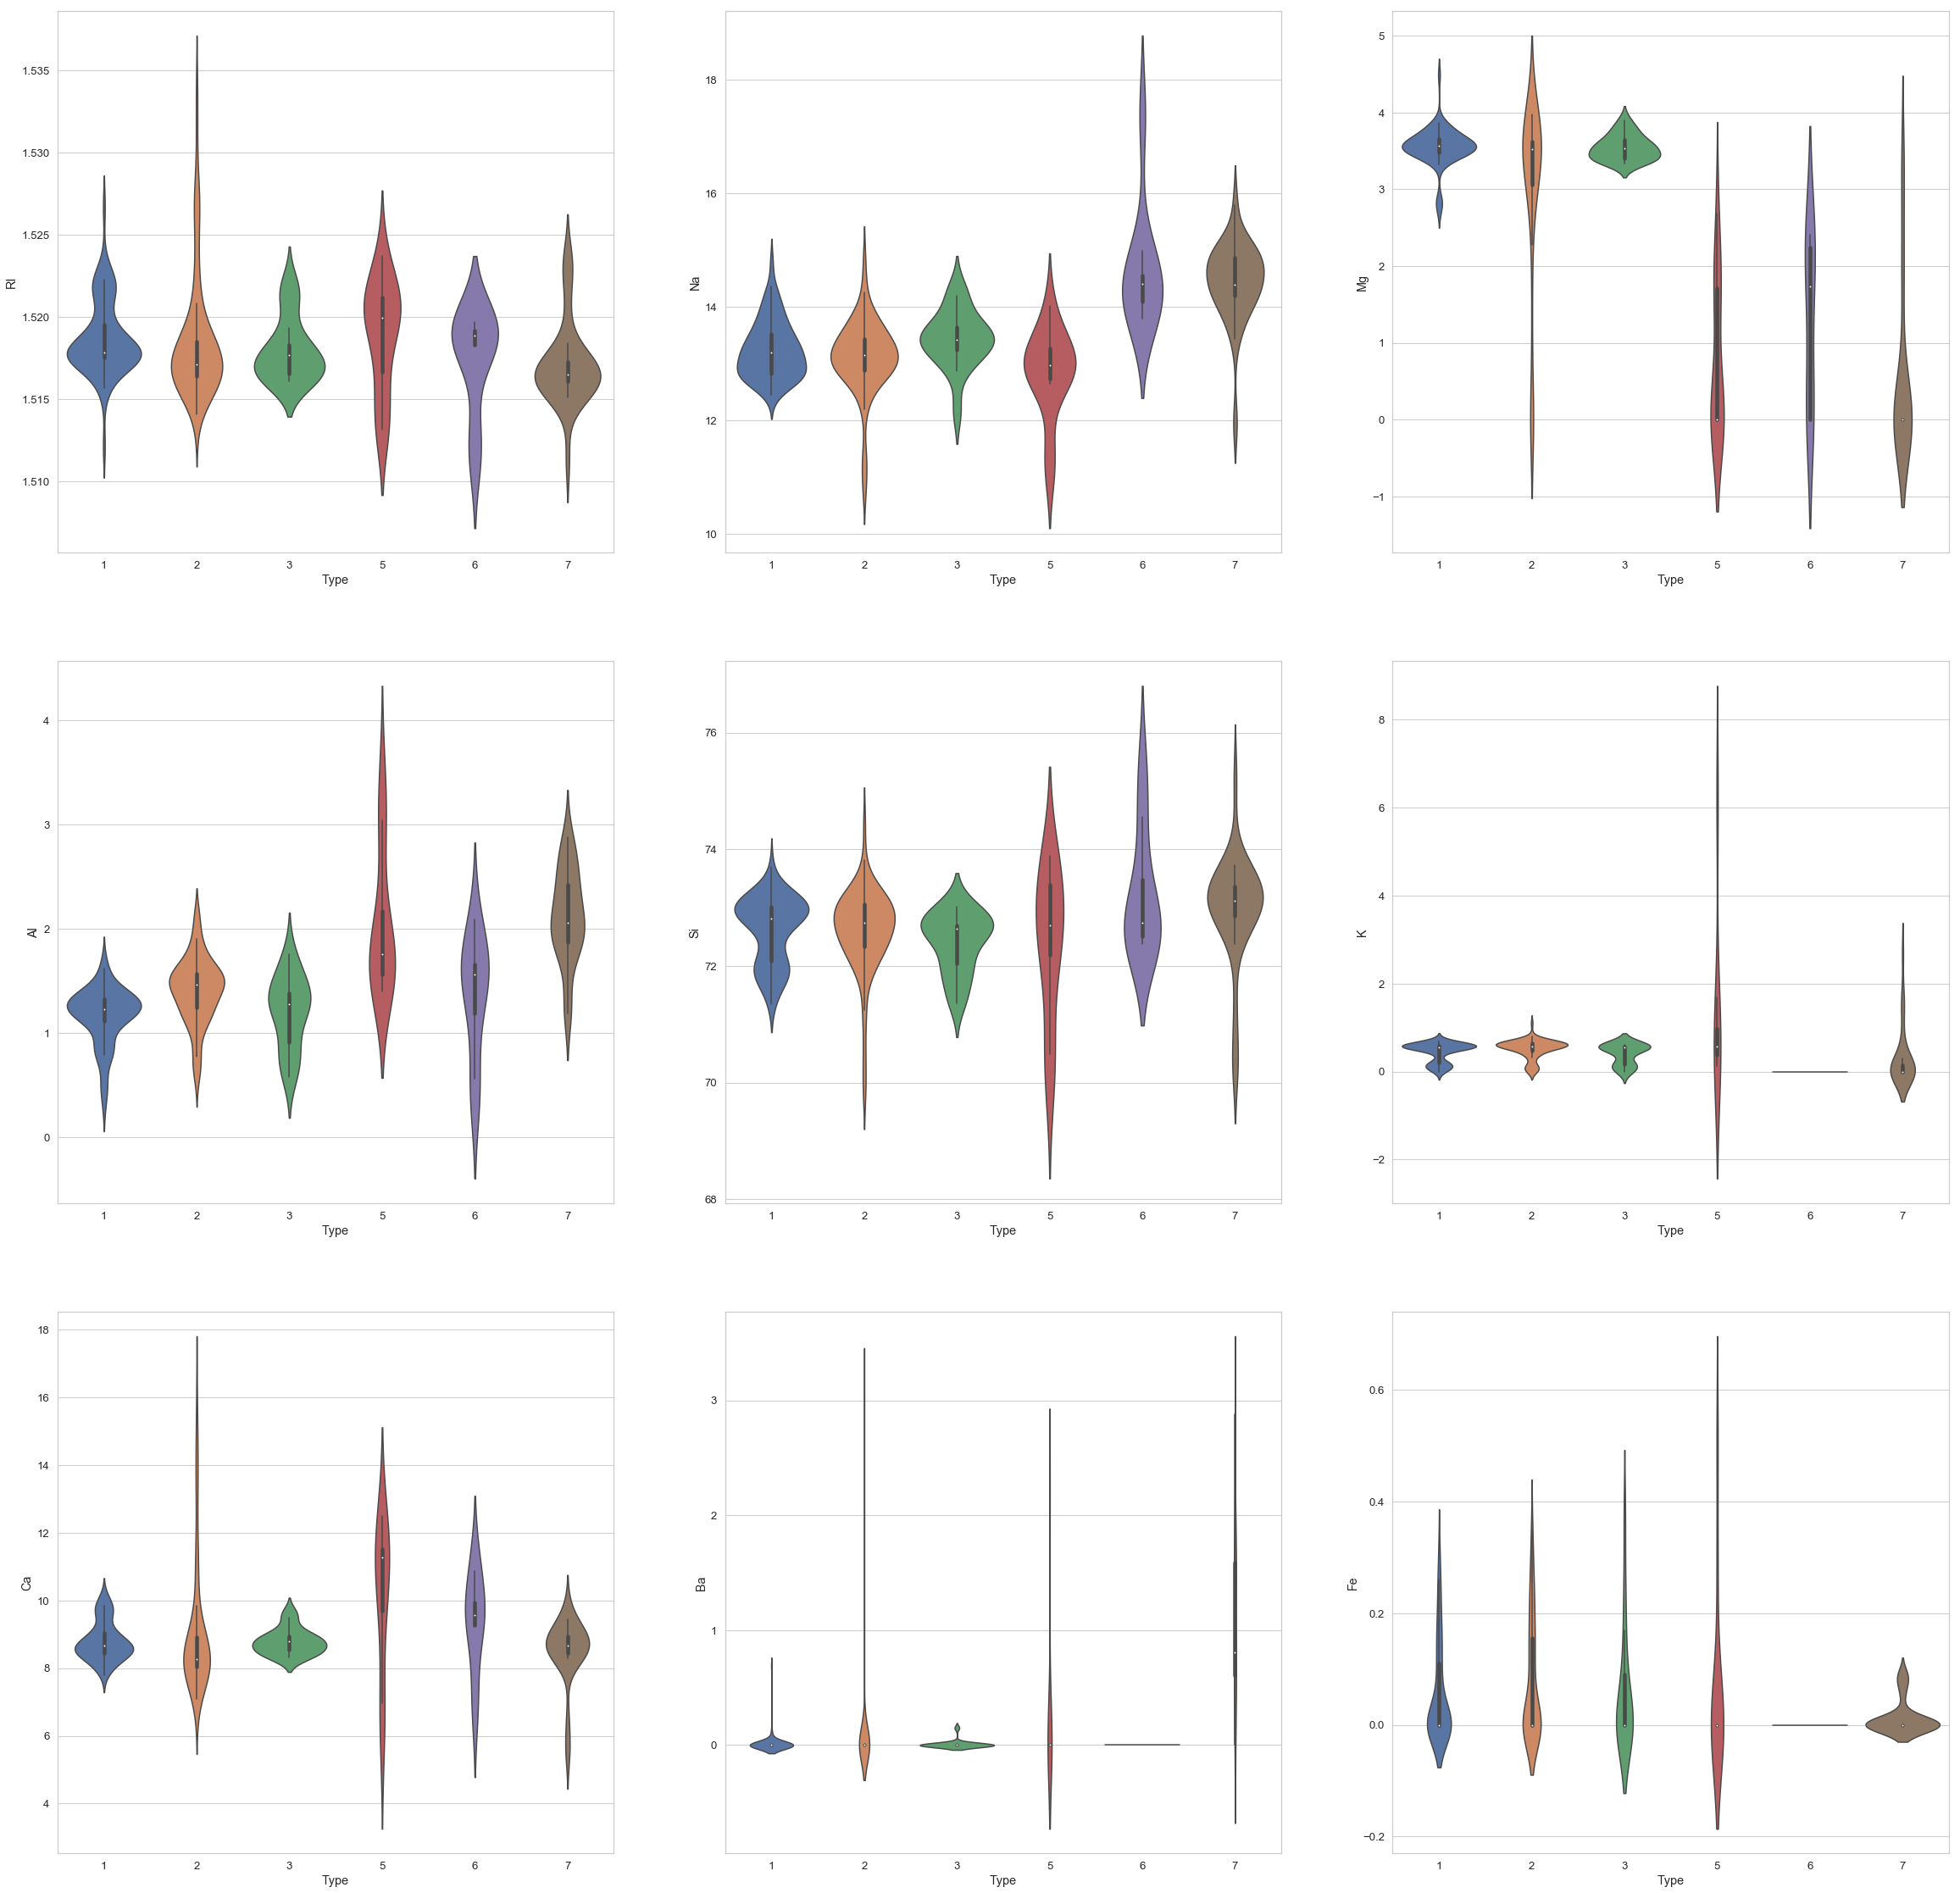

In [90]:

# violin plots of the data to compare the measurement distributions of the types
plt.figure(figsize=(40,40))

for column_index, column in enumerate(glass_df.columns):
    if column == 'Type':
        continue
    plt.subplot(3,3,column_index +1)
    sns.violinplot(x='Type', y=column, data=glass_df)

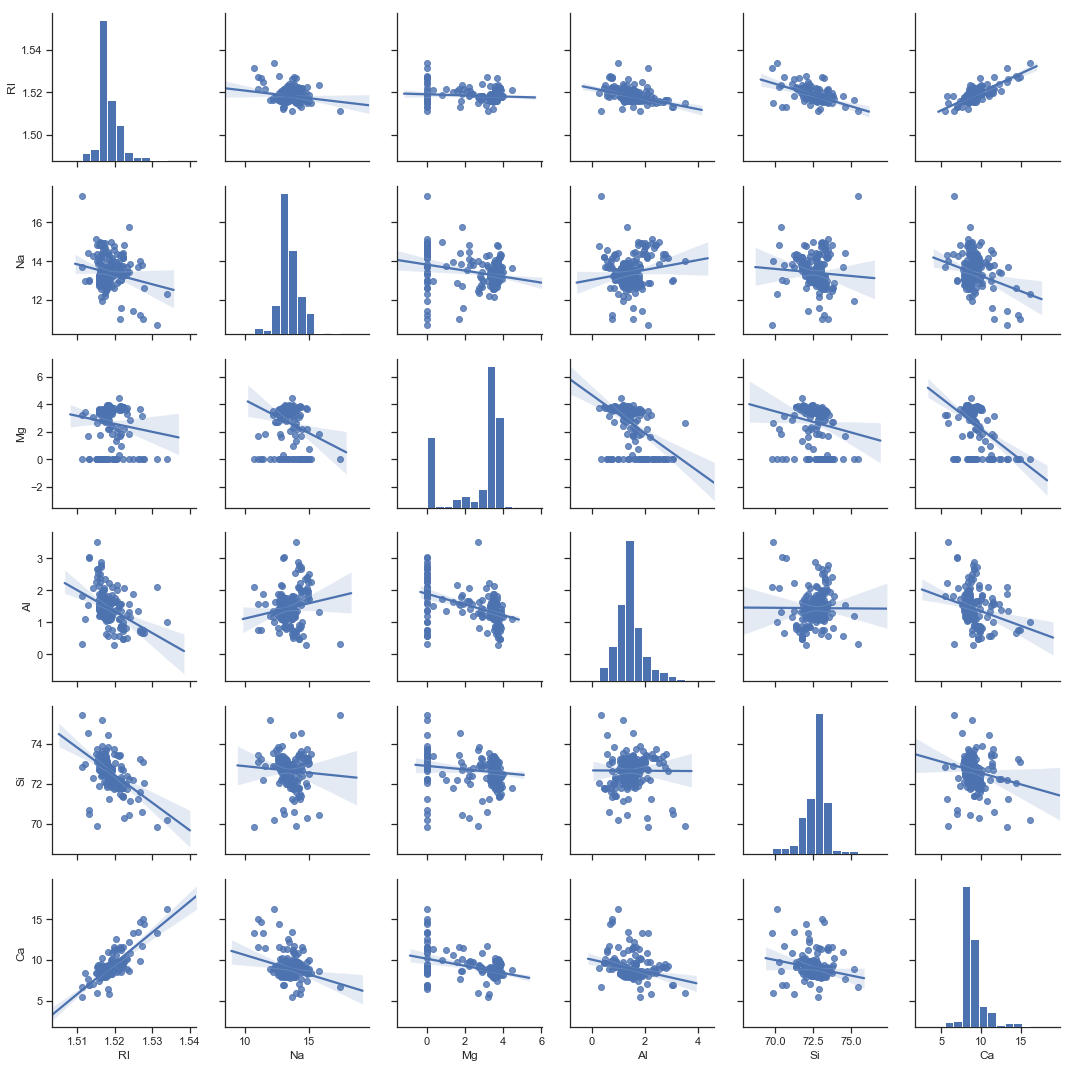

In [91]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df[['RI','Na','Mg','Al','Si','Ca']], kind='reg',palette="husl")

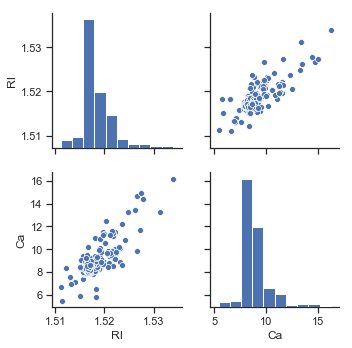

In [92]:
sns.pairplot(glass_df, vars=["RI", "Ca"])

strong relationship between Calcium and Refractive index.

In [93]:
glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


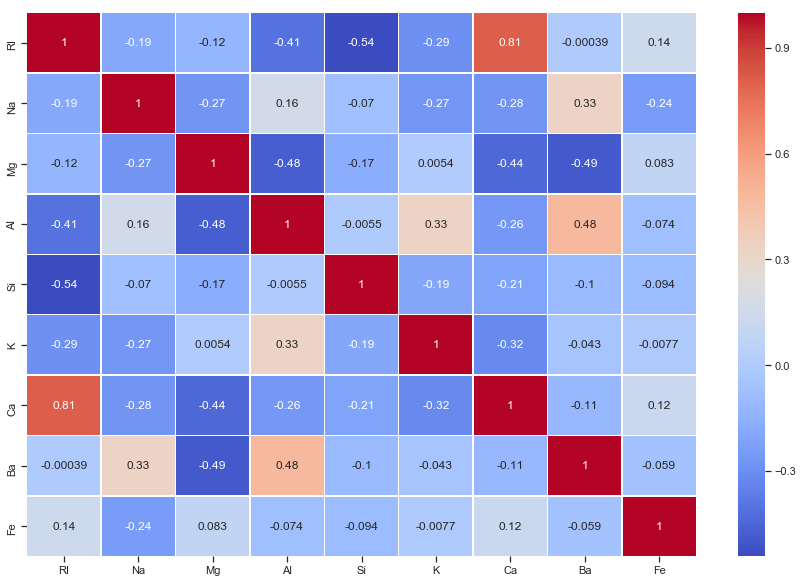

In [94]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].corr(),cmap='coolwarm',annot=True, linewidth=.5)

# Part VI Machine Learning (ML) Implementation: Model Selection and Evaluation 

### Feature Selection using Principal Component Analysis

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


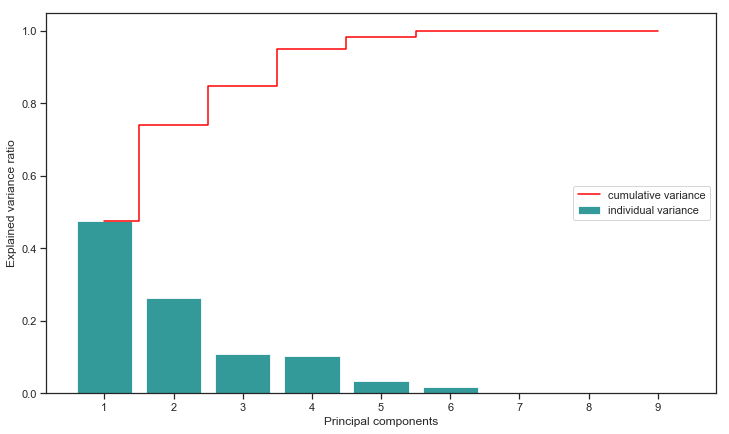

In [95]:
# Performing PCA
X_var = glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [96]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

In [97]:
X = X_reduced
y = glass_df["Type"].values

# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


# Comparison of algorithms

Ensemble Hard Voting

In [98]:
dec_clf = tree.DecisionTreeClassifier(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('df', dec_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [99]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('df', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [100]:
from sklearn.metrics import accuracy_score
for clf in (dec_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.6307692307692307
RandomForestClassifier 0.7692307692307693
SVC 0.7538461538461538
VotingClassifier 0.7692307692307693


Soft Voting

In [101]:
dec_clf = tree.DecisionTreeClassifier(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('dr', dec_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dr', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [102]:
from sklearn.metrics import accuracy_score

for clf in (dec_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.6307692307692307
RandomForestClassifier 0.7692307692307693
SVC 0.7538461538461538
VotingClassifier 0.6461538461538462


# Selected Model : Random Forest

### Fine tuning

In [103]:
clf = RandomForestClassifier( random_state = 0)
param_grid = {
    "n_estimators": [10,15,20],
    "max_depth":[2,5,10], 
    "min_samples_split":[2,5,10], 
    "min_samples_leaf":[2,5,10],
    "max_features" : ['sqrt', 'auto']
}
grid = GridSearchCV(clf, param_grid, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print(grid.best_params_)
accuracy_score(y_test, y_pred)

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


0.7692307692307693

In [104]:
clf = RandomForestClassifier( random_state = 0)
param_grid = {
    "n_estimators": [7,10,12],
    "max_depth":[3,5,7], 
    "min_samples_split":[3,5,7], 
    "min_samples_leaf":[2,5,10],
    "max_features" : ['sqrt', 'auto']
}
grid = GridSearchCV(clf, param_grid, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print(grid.best_params_)
accuracy_score(y_test, y_pred)

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


0.7692307692307693

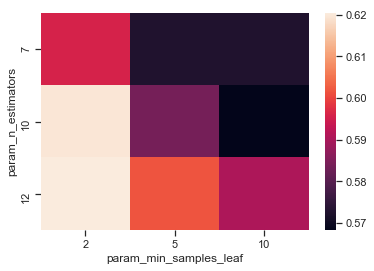

In [150]:
import pandas as pd
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_min_samples_leaf')
pvt1 = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
pvt2 = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_max_features')

ax = sns.heatmap(pvt)

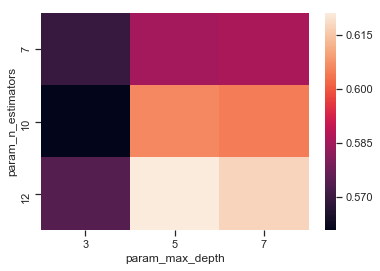

In [152]:
am = sns.heatmap(pvt1)

# Evaluation

In [105]:
print('Glass types dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(grid.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(grid.score(X_test, y_test)))

Glass types dataset
Accuracy of RF classifier on training set: 0.83
Accuracy of RF classifier on test set: 0.77


Text(442.70000000000005, 0.5, 'predicted label')

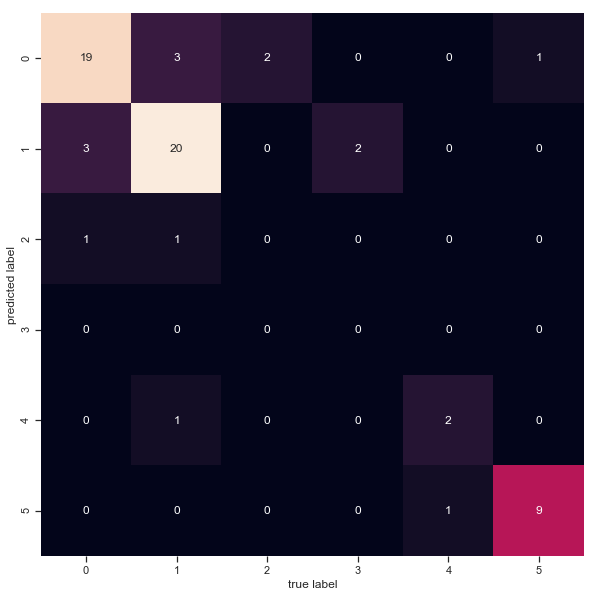

In [106]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(20,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.83      0.79        23
           2       0.80      0.80      0.80        25
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.67      0.67      0.67         3
           7       0.90      0.90      0.90        10

   micro avg       0.77      0.77      0.77        65
   macro avg       0.52      0.53      0.53        65
weighted avg       0.75      0.77      0.76        65

